<h1> <b> First-Come First-Serve 

<p> The modules imported were made by our team and can be accessed in fcfs.py

In [1]:
from fcfs import Process, calculate_fcfs, print_process_info, create_gantt_chart, plot_histograms, run_simulations

<h2> Simulation </h2>
<p> We'll create multiple simulations 

In [2]:
num_simulations = 5
min_processes = 5
max_processes = 30

fcfs_results, fcfs_processes = run_simulations(num_simulations, min_processes, max_processes)

print(fcfs_results)
print(fcfs_processes)

[(63.793103448275865, 68.75862068965517), (76.03448275862068, 81.41379310344827), (75.03448275862068, 81.06896551724138), (71.62068965517241, 77.55172413793103), (76.03448275862068, 81.89655172413794)]
[[<fcfs.Process object at 0x000001C53158AD90>, <fcfs.Process object at 0x000001C53158AE80>, <fcfs.Process object at 0x000001C53158AFA0>, <fcfs.Process object at 0x000001C53158AEB0>, <fcfs.Process object at 0x000001C53158AEE0>, <fcfs.Process object at 0x000001C53158ADF0>, <fcfs.Process object at 0x000001C531595100>, <fcfs.Process object at 0x000001C531595160>, <fcfs.Process object at 0x000001C531595190>, <fcfs.Process object at 0x000001C53158AD00>, <fcfs.Process object at 0x000001C5315951C0>, <fcfs.Process object at 0x000001C53158AF70>, <fcfs.Process object at 0x000001C53158ADC0>, <fcfs.Process object at 0x000001C53158AF10>, <fcfs.Process object at 0x000001C53158AD60>, <fcfs.Process object at 0x000001C53158AE20>, <fcfs.Process object at 0x000001C53158ACD0>, <fcfs.Process object at 0x00000

In [3]:
for x in range(num_simulations):
    print_process_info(fcfs_processes[0])

+-------+----------------+--------------+----------------+-------------------+
|   PID |   Arrival Time |   Burst Time |   Waiting Time |   Turnaround Time |
+=======+================+==============+================+===================+
|     4 |              0 |            4 |              0 |                 4 |
+-------+----------------+--------------+----------------+-------------------+
|     6 |              1 |            4 |              3 |                 7 |
+-------+----------------+--------------+----------------+-------------------+
|    10 |              1 |            5 |              7 |                12 |
+-------+----------------+--------------+----------------+-------------------+
|    14 |              1 |            4 |             12 |                16 |
+-------+----------------+--------------+----------------+-------------------+
|    16 |              1 |            5 |             16 |                21 |
+-------+----------------+--------------+-----------

<h2> Visualization 

<p> Gantt Chart

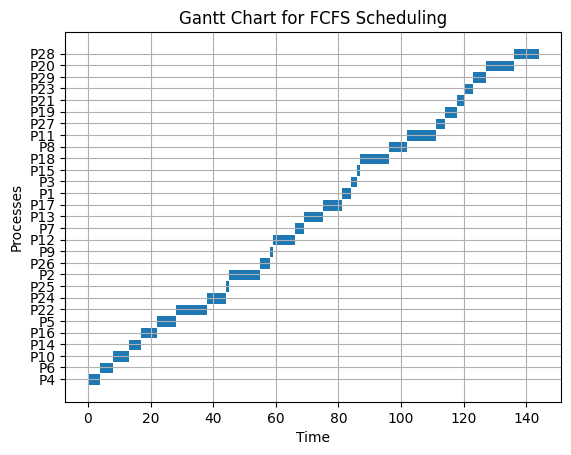

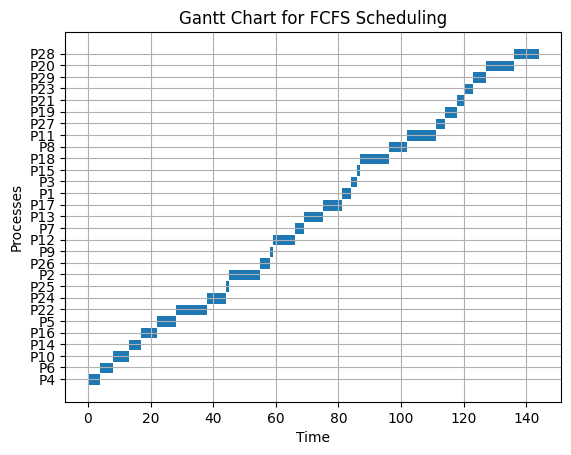

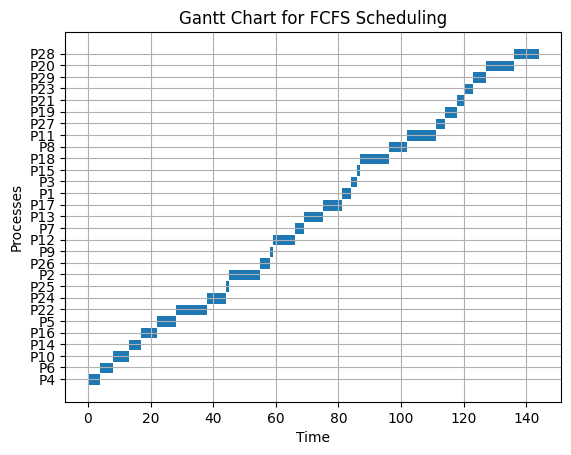

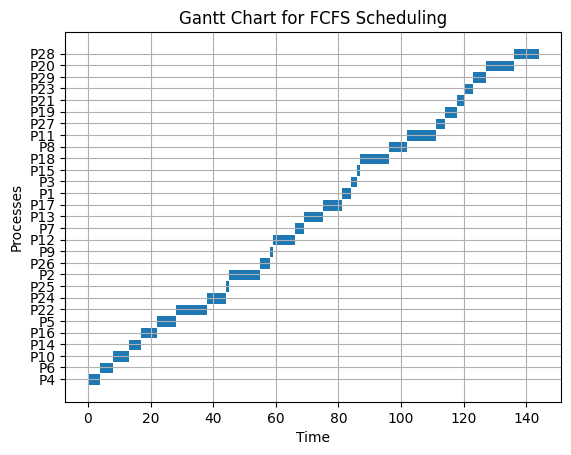

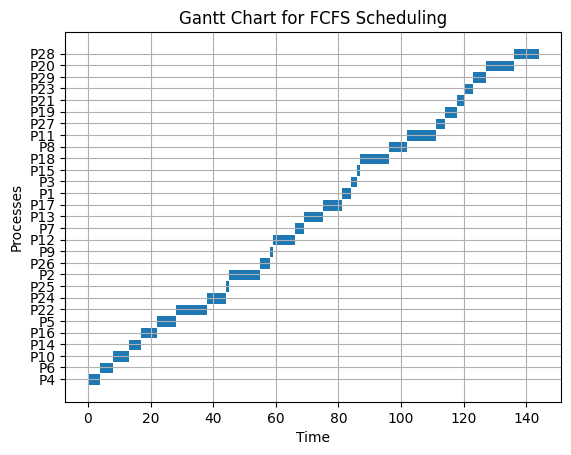

In [7]:
for x in range(num_simulations):
    create_gantt_chart(fcfs_processes[0])

Waiting Time / Turnaround Time histograms

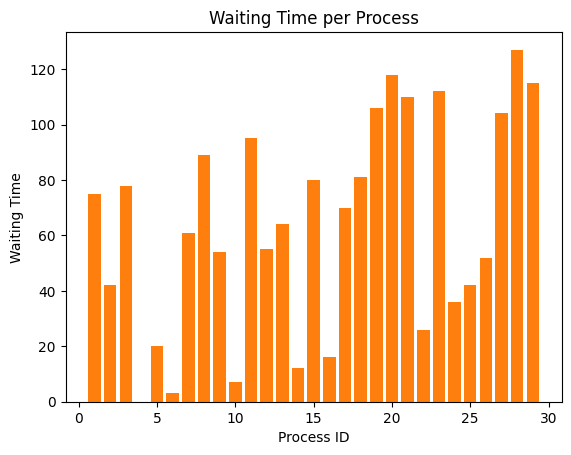

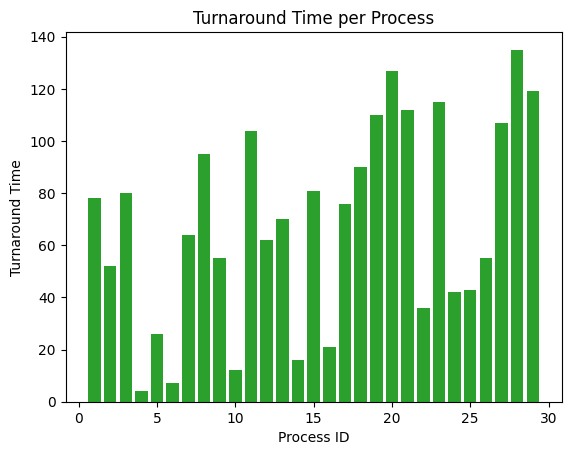

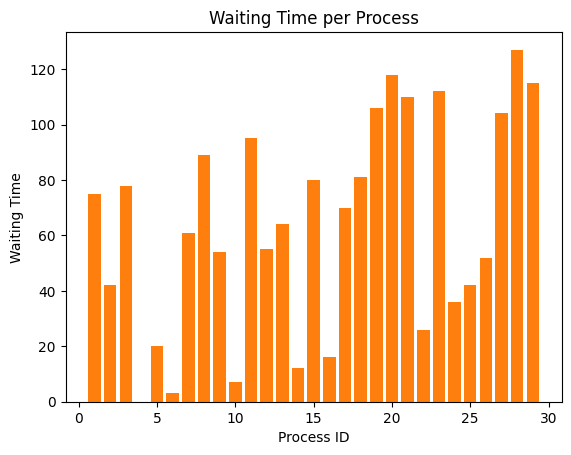

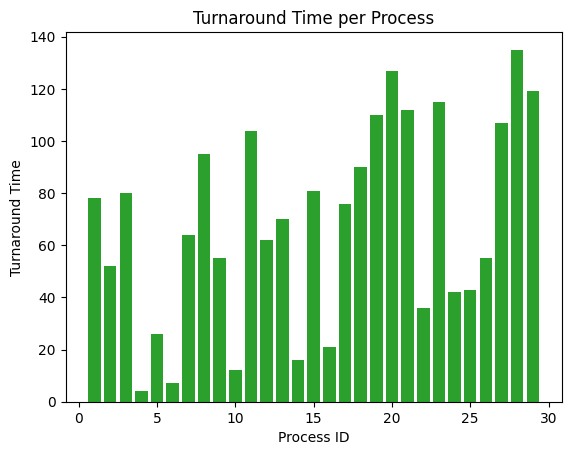

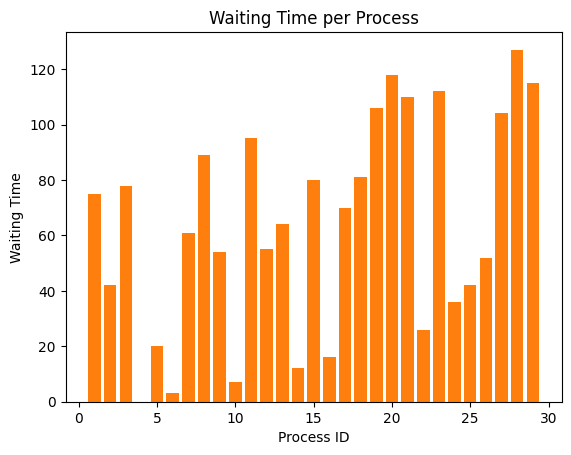

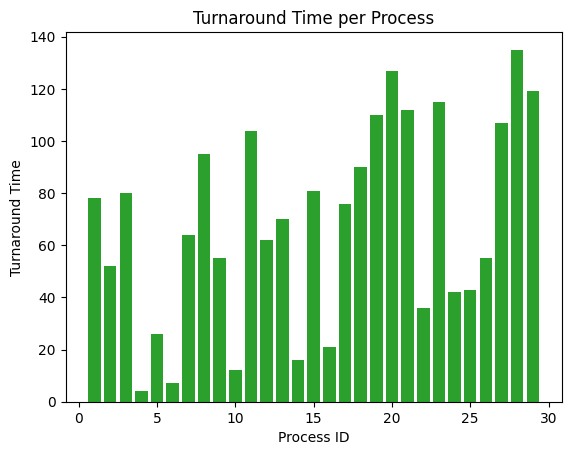

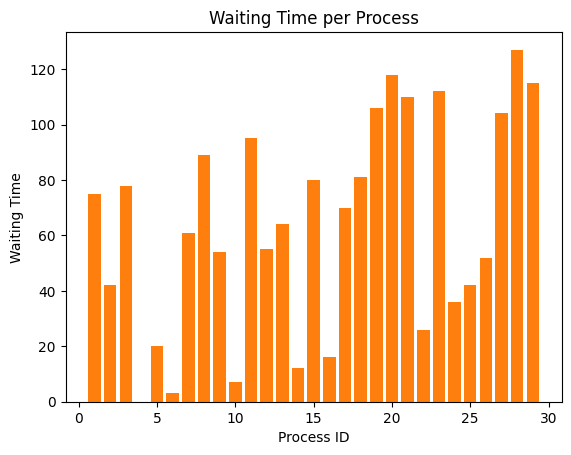

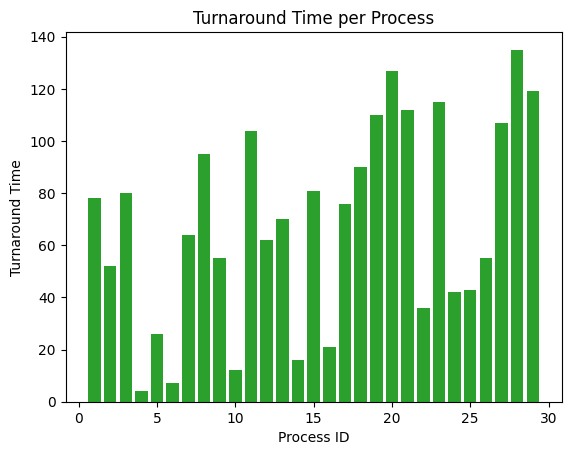

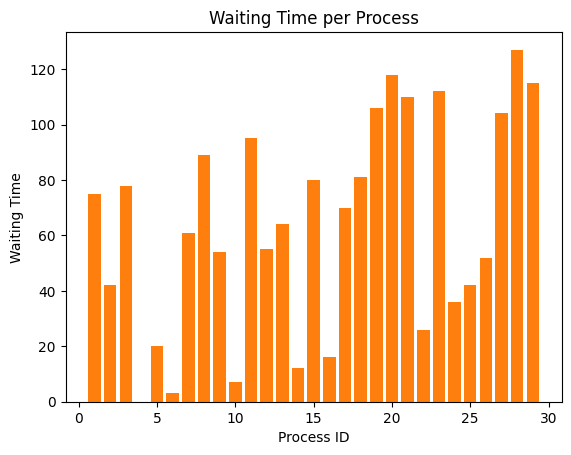

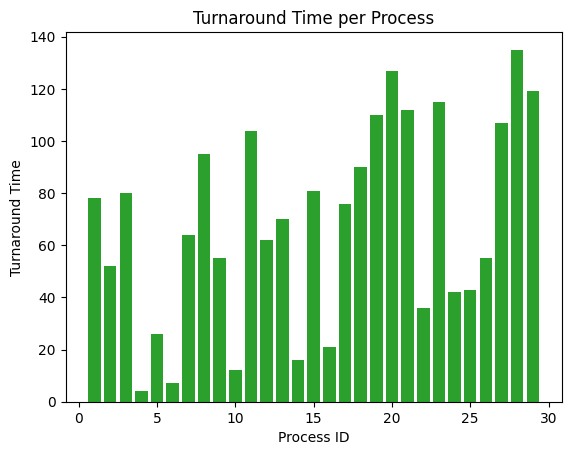

In [9]:
for x in range(num_simulations):
    plot_histograms(fcfs_processes[0])

<H2> Algorithm Evaluation

<p> Comparitive Analysis with other Algorithms